![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor


# import

In [579]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета, создания модели и метрики для теста модели:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

#для кодирования с помощью лейблов
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv


In [580]:
# фиксируем RANDOM_SEED
RANDOM_SEED = 42

In [581]:
# зафиксируем версию пакетов
!pip freeze > requirements.txt

# DATA

In [582]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [583]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [584]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [585]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [586]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [587]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [588]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [589]:
# функция приводит к единому стилю названия признаков в сете
def cols_to_lower(data):
    data_cols=[]
    for i in data.columns:
        i=i.replace(" ", "_").lower()
        data_cols.append(i)
    return data_cols

In [590]:
df_train.columns=cols_to_lower(df_train)
df_test.columns=cols_to_lower(df_test)

In [591]:
# для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['rating'] = 0 # в тесте у нас нет значения rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [592]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
restaurant_id        50000 non-null object
city                 50000 non-null object
cuisine_style        38410 non-null object
ranking              50000 non-null float64
price_range          32639 non-null object
number_of_reviews    46800 non-null float64
reviews              49998 non-null object
url_ta               50000 non-null object
id_ta                50000 non-null object
sample               50000 non-null int64
rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Описание признаков:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [593]:
data.sample(5)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating
36156,id_3063,London,"['Bar', 'British', 'Pub', 'Vegetarian Friendly...",3069.0,$$ - $$$,129.0,"[['Nice gastropub, amybe a bit noisy', ""Orwell...",/Restaurant_Review-g186338-d2516218-Reviews-Li...,d2516218,1,4.0
40972,id_1058,Barcelona,"['Mediterranean', 'Spanish', 'Vegetarian Frien...",1059.0,$$ - $$$,423.0,"[['Enjoyed dinner', 'Lovely good value food se...",/Restaurant_Review-g187497-d777346-Reviews-La_...,d777346,1,4.0
31945,id_8020,London,['Cafe'],8029.0,$$ - $$$,13.0,"[['Great brunch', 'Great drinks'], ['06/28/201...",/Restaurant_Review-g186338-d5817300-Reviews-Do...,d5817300,1,4.5
40491,id_1868,Rome,"['Italian', 'Pizza', 'Mediterranean', 'Vegetar...",1869.0,$$ - $$$,390.0,[['Great food. Very friendly service and good....,/Restaurant_Review-g187791-d4022608-Reviews-Il...,d4022608,1,3.5
2888,id_2888,London,"['Mediterranean', 'Barbecue', 'Turkish', 'Midd...",1221.0,$,227.0,"[['Good food and reasonable value', 'Good food...",/Restaurant_Review-g186338-d1017384-Reviews-Ma...,d1017384,0,0.0


In [594]:
data.reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data

## 2. Обработка признаков
### price_range

In [595]:
data['price_range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: price_range, dtype: int64

Добавим в data frame колонку признак отсутствия данных в price_range

In [596]:
data['price_nan'] = data['price_range'].isna()

Заменим уровень цен на низкий, средний, высокий - ```$, $$-$$$, $$$$```. Nan заполним средним значением

In [597]:
data['price_range'].fillna('$$ - $$$', inplace=True)

In [598]:
price_range_dict = {
    '$': 1,
    '$$ - $$$': 2,
    '$$$$': 3
}
data['price_range'] = data['price_range'].map(price_range_dict)
data.head()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_nan
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,False
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,False
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,False
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,False
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,False


In [599]:
data['price_range'].unique()

array([2, 3, 1])

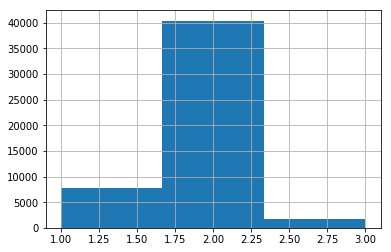

In [600]:
data['price_range'].hist(bins=3)

### city

In [601]:
data['city'].nunique()

31

Закодируем каждое название города числом, используем sklearn.preprocessign.LabelEncoder

In [602]:
city_label = LabelEncoder()
city_label.fit(data['city'])
data['city_label'] = city_label.transform(data['city'])
data.head()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_nan,city_label
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,False,24
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,False,12
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,False,9
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,False,16
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,False,4


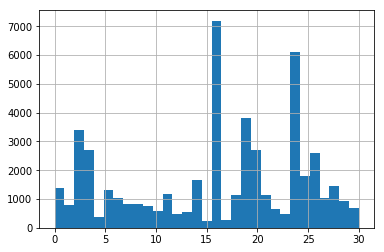

In [603]:
data['city_label'].hist(bins=31)

### cuisine_style

Определим количество уникальных значений в кухнях.

In [604]:
import collections
import re

cuisines=[]
for c in data[data['cuisine_style'].isnull()==False].cuisine_style:
    str_c=c.split(',')
    for i in str_c:
        i = re.sub(r"[^a-zA-Z0-9]+", '', i)
        cuisines.append(i)
len(cuisines)

119676

Добавим столбец, где выделим отсутствие кухни в данных.

In [605]:
data['cuisine_nan'] = data['cuisine_style'].isna()
data.head()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_nan,city_label,cuisine_nan
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,False,24,False
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,False,12,False
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,False,9,False
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,False,16,False
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,False,4,False


In [606]:
len(set(cuisines))

125

Заменим пустые значения в этой колонке на VegetarianFriendly (наиболее частотное значение), вычислим среднее количество кухонь в ресторанах.

In [607]:
data['cuisine_style'].fillna('VegetarianFriendly', inplace=True)

In [608]:
li=[] 
for c in data.cuisine_style:
    str_c=c.split(',')
    li.append(len(str_c))
sum(li)/len(li)

2.62532

Добавим количество кухонь в ресторане как отдельный признак.

In [609]:
data['num_cuisines']=li
data.sample()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_nan,city_label,cuisine_nan,num_cuisines
20579,id_2049,Brussels,"['Brazilian', 'Healthy', 'South American']",2050.0,2,3.0,"[[], []]",/Restaurant_Review-g188644-d7623482-Reviews-Po...,d7623482,1,4.5,True,5,False,3


In [610]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
restaurant_id        50000 non-null object
city                 50000 non-null object
cuisine_style        50000 non-null object
ranking              50000 non-null float64
price_range          50000 non-null int64
number_of_reviews    46800 non-null float64
reviews              49998 non-null object
url_ta               50000 non-null object
id_ta                50000 non-null object
sample               50000 non-null int64
rating               50000 non-null float64
price_nan            50000 non-null bool
city_label           50000 non-null int64
cuisine_nan          50000 non-null bool
num_cuisines         50000 non-null int64
dtypes: bool(2), float64(3), int64(4), object(6)
memory usage: 5.1+ MB


### number_of_reviews + reviews

В number_of_reviews есть выбросы, закодируем их отдельным признаком.

In [611]:
data['nan_num_reviews'] = pd.isna(data['number_of_reviews'])
data.sample()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews
2812,id_2812,Berlin,"['Cafe', 'Vegetarian Friendly', 'Vegan Options']",1101.0,2,28.0,"[[""A juice selection 'Joe the juicer' would l....",/Restaurant_Review-g187323-d6725512-Reviews-Ne...,d6725512,0,0.0,False,3,False,3,False


In [612]:
data['number_of_reviews'].isna().sum()

3200

nan содержит 6,4% number_of_reviews. Есть рестораны, где число отзывов не указано, но сами отзывы в колонке review есть и наоборот - примера отзыва нет, но количество отзывов больше нуля. Чтобы корректно заменить nan в number_of_reviews сначала нужно почистить reviews.
В признаке reviews пропусками являются строки содержащие значение 
$[[], []]$
, поместим их в отдельный признак:

In [613]:
data['reviews'].isna().sum()

2

In [614]:
data['reviews'].fillna('[[], []]', inplace=True)

In [615]:
data['nan_reviews'] = data['reviews']=='[[], []]'
data.sample()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews
26348,id_2305,Berlin,['Asian'],2307.0,2,36.0,"[['Amazing!!', 'Excellent restuarant'], ['12/2...",/Restaurant_Review-g187323-d1422281-Reviews-Aa...,d1422281,1,4.0,False,3,False,1,False,False


Найдем все даты в отзывах с использованием модуля re, добавим признак len_dates - количество дат(кол-во примеров отзывов)

In [616]:
data['rev_dates'] = data['reviews'].str.findall('\d+/\d+/\d+')
data.head()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,rev_dates
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,False,24,False,2,False,True,[]
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,False,12,False,5,False,False,"[12/05/2017, 10/29/2017]"
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,False,9,False,1,False,False,"[12/28/2017, 12/06/2017]"
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,False,16,False,5,False,False,"[12/06/2017, 11/22/2017]"
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,False,4,False,6,False,False,"[02/08/2018, 01/24/2018]"


In [617]:
data['len_dates'] = data['rev_dates'].apply(lambda x: len(x))
data['len_dates'].unique()

array([0, 2, 1, 3])

In [618]:
data[data['len_dates']==3]

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,rev_dates,len_dates
2221,id_2221,London,"['Lebanese', 'Fast Food', 'Mediterranean', 'Tu...",3552.0,1,202.0,"[['We visited 21/10/17', 'Best Kebab in London...",/Restaurant_Review-g186338-d1009460-Reviews-Ta...,d1009460,0,0.0,False,16,False,6,False,False,"[21/10/17, 12/22/2017, 10/19/2017]",3
3809,id_3809,Stockholm,"['European', 'Swedish', 'Scandinavian']",956.0,2,9.0,"[['Good Museum Cafeteria', 'Lunch 30/5/2017'],...",/Restaurant_Review-g189852-d12318961-Reviews-N...,d12318961,0,0.0,True,27,False,3,False,False,"[30/5/2017, 04/13/2017, 05/30/2017]",3
19254,id_12965,London,"['Cafe', 'French']",12975.0,2,31.0,"[['The desserts arcade !', 'Visit today 3/1/20...",/Restaurant_Review-g186338-d1017372-Reviews-Ma...,d1017372,1,3.5,False,16,False,2,False,False,"[3/1/2017, 06/02/2017, 01/03/2017]",3
33348,id_450,Geneva,"['French', 'European']",453.0,2,48.0,"[['lunch 29/9/2016', 'Unplanned Great Dinner']...",/Restaurant_Review-g188057-d2706773-Reviews-Le...,d2706773,1,4.0,False,10,False,2,False,False,"[29/9/2016, 09/30/2016, 08/25/2016]",3


Удалим лишнюю дату из кол-ва примеров отзывов.

In [619]:
data[data['len_dates']==3].rev_dates.apply(lambda x: x.pop(0))
data['len_dates'] = data['rev_dates'].apply(lambda x: len(x))
data['len_dates'].unique()

array([0, 2, 1])

In [620]:
data['len_dates'].value_counts()

2    36206
0     8114
1     5680
Name: len_dates, dtype: int64

Дополнительно обозначим отдельным признаком ретораны, где есть только один отзыв.

In [621]:
data['one_review']=data['len_dates']==1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
restaurant_id        50000 non-null object
city                 50000 non-null object
cuisine_style        50000 non-null object
ranking              50000 non-null float64
price_range          50000 non-null int64
number_of_reviews    46800 non-null float64
reviews              50000 non-null object
url_ta               50000 non-null object
id_ta                50000 non-null object
sample               50000 non-null int64
rating               50000 non-null float64
price_nan            50000 non-null bool
city_label           50000 non-null int64
cuisine_nan          50000 non-null bool
num_cuisines         50000 non-null int64
nan_num_reviews      50000 non-null bool
nan_reviews          50000 non-null bool
rev_dates            50000 non-null object
len_dates            50000 non-null int64
one_review           50000 non-null bool
dtypes: bool(5), float64(3), int64(5), obje

Добавляем признак - количество дней между отзывами.

In [622]:
def days_bw_revs(row):
    if row['rev_dates'] == []:
        return None
    return pd.to_datetime(row['rev_dates']).max() - pd.to_datetime(row['rev_dates']).min()

data['days_bw_revs'] = data[data['len_dates']==2].apply(days_bw_revs, axis=1).dt.days
data.head()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,rev_dates,len_dates,one_review,days_bw_revs
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,False,24,False,2,False,True,[],0,False,NaN
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,False,12,False,5,False,False,"[12/05/2017, 10/29/2017]",2,False,37.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,False,9,False,1,False,False,"[12/28/2017, 12/06/2017]",2,False,22.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,False,16,False,5,False,False,"[12/06/2017, 11/22/2017]",2,False,14.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,False,4,False,6,False,False,"[02/08/2018, 01/24/2018]",2,False,15.0


In [623]:
data['days_bw_revs'].fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
restaurant_id        50000 non-null object
city                 50000 non-null object
cuisine_style        50000 non-null object
ranking              50000 non-null float64
price_range          50000 non-null int64
number_of_reviews    46800 non-null float64
reviews              50000 non-null object
url_ta               50000 non-null object
id_ta                50000 non-null object
sample               50000 non-null int64
rating               50000 non-null float64
price_nan            50000 non-null bool
city_label           50000 non-null int64
cuisine_nan          50000 non-null bool
num_cuisines         50000 non-null int64
nan_num_reviews      50000 non-null bool
nan_reviews          50000 non-null bool
rev_dates            50000 non-null object
len_dates            50000 non-null int64
one_review           50000 non-null bool
days_bw_revs         50000 non-null float64

В признаке number_of_reviews есть nan-значения (6.3%), поменяем их на 0:

In [624]:
data.loc[data['number_of_reviews'].isnull(),'number_of_reviews']=0

Добавим признак определяющий актуальность самого последнего отзыва, т.е. разницу между текущей датой и датой самого последнего отзыва по ресторану.

In [625]:
CURRENT_DATE= pd.to_datetime('02/07/2020')
def revs_relevance(row):
    return CURRENT_DATE-pd.to_datetime(row['rev_dates']).max()

data['revs_relevance'] = data[data['len_dates']>0].apply(revs_relevance, axis=1).dt.days
data.head()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,rev_dates,len_dates,one_review,days_bw_revs,revs_relevance
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,24,False,2,False,True,[],0,False,0.0,NaN
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,12,False,5,False,False,"[12/05/2017, 10/29/2017]",2,False,37.0,794.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,9,False,1,False,False,"[12/28/2017, 12/06/2017]",2,False,22.0,771.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,16,False,5,False,False,"[12/06/2017, 11/22/2017]",2,False,14.0,793.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,4,False,6,False,False,"[02/08/2018, 01/24/2018]",2,False,15.0,729.0


In [626]:
data['nan_revs_relevance'] = data['revs_relevance'].isna()
data['revs_relevance'].fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
restaurant_id         50000 non-null object
city                  50000 non-null object
cuisine_style         50000 non-null object
ranking               50000 non-null float64
price_range           50000 non-null int64
number_of_reviews     50000 non-null float64
reviews               50000 non-null object
url_ta                50000 non-null object
id_ta                 50000 non-null object
sample                50000 non-null int64
rating                50000 non-null float64
price_nan             50000 non-null bool
city_label            50000 non-null int64
cuisine_nan           50000 non-null bool
num_cuisines          50000 non-null int64
nan_num_reviews       50000 non-null bool
nan_reviews           50000 non-null bool
rev_dates             50000 non-null object
len_dates             50000 non-null int64
one_review            50000 non-null bool
days_bw_revs          5

### restaurant_id, id_ta, url_ta

В колонках restaurant_id, id_ta, url_ta приведем данные к цифрам, отбросив все нечисловые части строк.

In [627]:
data['restaurant_id'] = data['restaurant_id'].apply(lambda x: int(x[3:]))
data['id_ta'] = data['id_ta'].apply(lambda x: int(x[1:]))
data['url_ta'] = data['url_ta'].str.split('-').apply(lambda x: int(x[1][1:]))

In [628]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
restaurant_id         50000 non-null int64
city                  50000 non-null object
cuisine_style         50000 non-null object
ranking               50000 non-null float64
price_range           50000 non-null int64
number_of_reviews     50000 non-null float64
reviews               50000 non-null object
url_ta                50000 non-null int64
id_ta                 50000 non-null int64
sample                50000 non-null int64
rating                50000 non-null float64
price_nan             50000 non-null bool
city_label            50000 non-null int64
cuisine_nan           50000 non-null bool
num_cuisines          50000 non-null int64
nan_num_reviews       50000 non-null bool
nan_reviews           50000 non-null bool
rev_dates             50000 non-null object
len_dates             50000 non-null int64
one_review            50000 non-null bool
days_bw_revs          5000

Добавим признак кода страны. Для этого создадим словарь стран и городов.

In [629]:
country = {
    'London': 'United Kingdom',
    'Paris': 'France',
    'Madrid': 'Spain',
    'Barcelona': 'Spain',
    'Berlin': 'Germany',
    'Milan': 'Italy',
    'Rome': 'Italy',
    'Prague': 'Czech Republic',
    'Lisbon': 'Portugal',
    'Vienna': 'Austria',
    'Amsterdam': 'Netherlands',
    'Brussels': 'Belgium',
    'Hamburg': 'Germany',
    'Munich': 'Germany',
    'Lyon': 'France',
    'Stockholm': 'Sweden',
    'Budapest': 'Hungary',
    'Warsaw': 'Poland',
    'Dublin': 'Ireland' ,
    'Copenhagen': 'Denmark',
    'Athens': 'Greece',
    'Edinburgh': 'United Kingdom',
    'Zurich': 'Switzerland',
    'Oporto': 'Portugal',
    'Geneva': 'Switzerland',
    'Krakow': 'Poland',
    'Oslo': 'Norway',
    'Helsinki': 'Finland',
    'Bratislava': 'Slovakia',
    'Luxembourg': 'Luxembourg',
    'Ljubljana': 'Slovenia'
}

data['country'] = data['city'].map(country)

Используем sklearn.preprocessign.LabelEncoder для добавления признака-код страны.

In [630]:
country_label = LabelEncoder()
country_label.fit(data['country'])
data['country_code'] = country_label.transform(data['country'])

In [631]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
restaurant_id         50000 non-null int64
city                  50000 non-null object
cuisine_style         50000 non-null object
ranking               50000 non-null float64
price_range           50000 non-null int64
number_of_reviews     50000 non-null float64
reviews               50000 non-null object
url_ta                50000 non-null int64
id_ta                 50000 non-null int64
sample                50000 non-null int64
rating                50000 non-null float64
price_nan             50000 non-null bool
city_label            50000 non-null int64
cuisine_nan           50000 non-null bool
num_cuisines          50000 non-null int64
nan_num_reviews       50000 non-null bool
nan_reviews           50000 non-null bool
rev_dates             50000 non-null object
len_dates             50000 non-null int64
one_review            50000 non-null bool
days_bw_revs          5000

### ranking

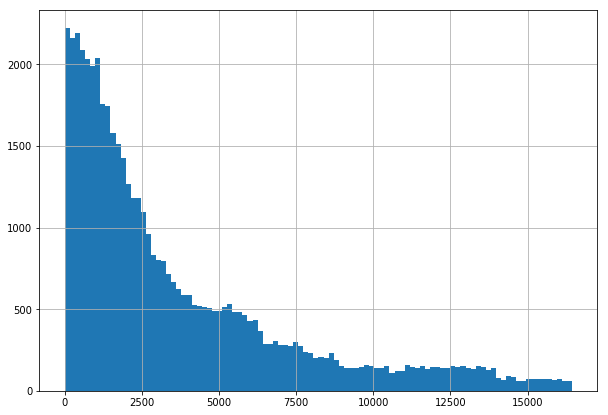

In [632]:
plt.rcParams['figure.figsize'] = (10,7)
data['ranking'].hist(bins=100)

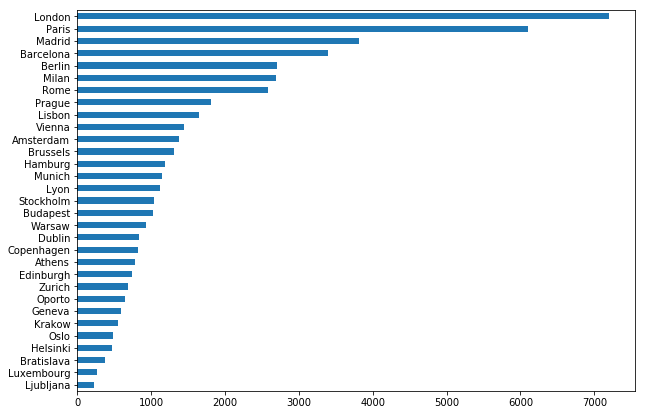

In [633]:
data['city'].value_counts(ascending=True).plot(kind='barh')

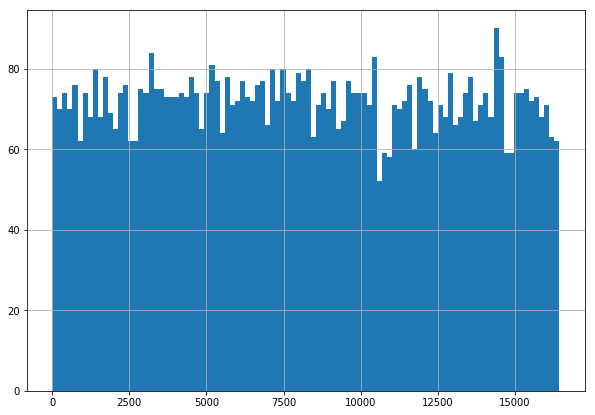

In [634]:
data['ranking'][data['city'] =='London'].hist(bins=100)

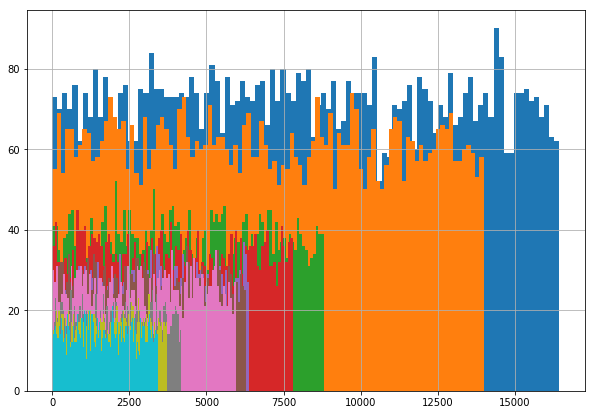

In [635]:
# посмотрим на топ 10 городов
for x in (data['city'].value_counts())[0:10].index:
    data['ranking'][data['city'] == x].hist(bins=100)
plt.show()

Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

Посчитаем сколько ресторанов есть в каждом городе и добавим это как новый признак.

In [636]:
restaurants_in_city=data['city'].value_counts(ascending=False)
data['restaurant_in_city']=data['city'].apply(lambda x: restaurants_in_city[x])
data.tail()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,nan_reviews,rev_dates,len_dates,one_review,days_bw_revs,revs_relevance,nan_revs_relevance,country,country_code,restaurant_in_city
49995,499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",187849,2104414,1,...,False,"[12/16/2017, 11/12/2017]",2,False,34.0,783.0,False,Italy,10,2694
49996,6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",187147,1800036,1,...,False,"[12/21/2017, 12/12/2017]",2,False,9.0,778.0,False,France,5,6108
49997,1649,Stockholm,"['Japanese', 'Sushi']",1652.0,2,4.0,"[['Good by swedish standards', 'A hidden jewel...",189852,947615,1,...,False,"[11/03/2016, 04/12/2008]",2,False,3127.0,1191.0,False,Sweden,19,1033
49998,640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",274856,1100838,1,...,False,"[07/11/2017, 06/18/2017]",2,False,23.0,941.0,False,Poland,14,925
49999,4824,Milan,['Spanish'],4827.0,2,260.0,"[['Average', 'Nice an informal'], ['01/31/2016...",187849,1109020,1,...,False,"[01/31/2016, 07/04/2012]",2,False,1306.0,1468.0,False,Italy,10,2694


Посчитаем средний рейтинг (rank) ресторана в привязке к городу.

In [637]:
mean_rank=data.groupby(['city'])['ranking'].mean()
mean_rank

city
Amsterdam     1591.589650
Athens         880.213918
Barcelona     3879.422680
Berlin        3255.417745
Bratislava     462.428947
Brussels      1541.901826
Budapest      1219.061704
Copenhagen     982.147741
Dublin         972.127990
Edinburgh      885.130201
Geneva         713.227119
Hamburg       1375.409781
Helsinki       564.231579
Krakow         616.267148
Lisbon        1867.330298
Ljubljana      234.509009
London        8169.707354
Luxembourg     308.159696
Lyon          1303.902309
Madrid        4388.516391
Milan         3106.027840
Munich        1370.297817
Oporto         752.034268
Oslo           552.569672
Paris         6938.557138
Prague        2086.979626
Rome          2970.733102
Stockholm     1237.482091
Vienna        1711.275814
Warsaw        1055.193514
Zurich         794.280292
Name: ranking, dtype: float64

In [638]:
data['mean_city_rank']=data['city'].apply(lambda x: mean_rank[x])

In [639]:
data['rank_on_num_restaurants'] = (data['ranking']-data['mean_city_rank'])/data['restaurant_in_city']
data.head()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,len_dates,one_review,days_bw_revs,revs_relevance,nan_revs_relevance,country,country_code,restaurant_in_city,mean_city_rank,rank_on_num_restaurants
0,0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",187147,10746918,0,...,0,False,0.0,0.0,True,France,5,6108,6938.557138,0.986320
1,1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",189934,6674944,0,...,2,False,37.0,794.0,False,Finland,4,475,564.231579,-0.964698
2,2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",186525,13129638,0,...,2,False,22.0,771.0,False,United Kingdom,21,745,885.130201,-0.100846
3,3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",186338,680417,0,...,2,False,14.0,793.0,False,United Kingdom,21,7193,8169.707354,-0.903755
4,4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",274924,1112354,0,...,2,False,15.0,729.0,False,Slovakia,16,380,462.428947,-1.119550


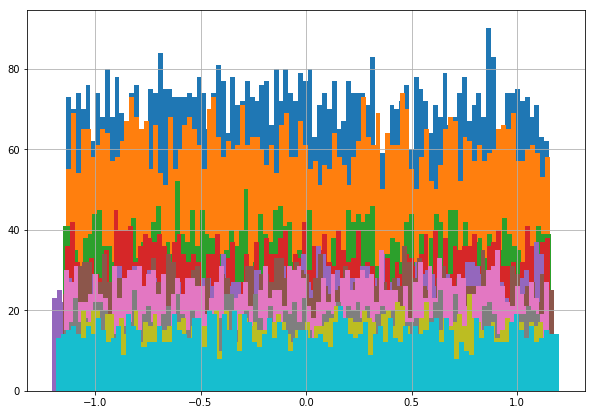

In [640]:
# посмотрим на топ 10 городов по rank_on_num_restaurants
for x in (data['city'].value_counts())[0:10].index:
    data['rank_on_num_restaurants'][data['city'] == x].hist(bins=100)
plt.show()

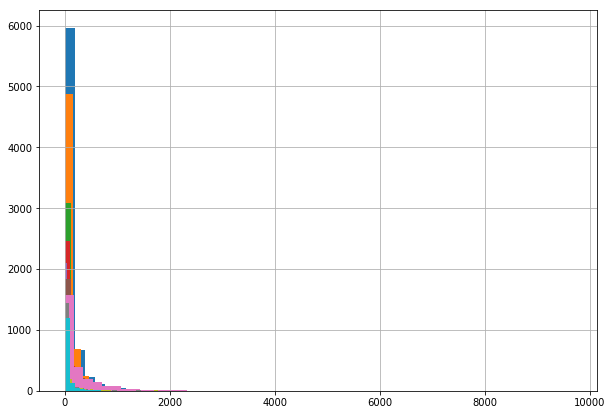

In [641]:
# посмотрим на топ 10 городов по признаку number_of_reviews
for x in (data['city'].value_counts())[0:10].index:
    data['number_of_reviews'][data['city'] == x].hist(bins=50)
plt.show()

In [642]:
mean_revs=data.groupby(['city'])['number_of_reviews'].mean()
mean_revs

city
Amsterdam     141.263848
Athens         87.326031
Barcelona     126.491016
Berlin         57.642514
Bratislava     43.873684
Brussels       86.724505
Budapest      145.314398
Copenhagen     89.951160
Dublin        146.894737
Edinburgh     231.010738
Geneva         57.747458
Hamburg        41.191400
Helsinki       62.128421
Krakow        122.084838
Lisbon        119.214936
Ljubljana      82.292793
London        129.816488
Luxembourg     79.152091
Lyon           83.438721
Madrid         93.675584
Milan         160.115071
Munich         71.952838
Oporto        125.163551
Oslo           95.495902
Paris         111.464800
Prague        110.063326
Rome          281.280417
Stockholm      69.301065
Vienna         73.949411
Warsaw         60.147027
Zurich         68.275912
Name: number_of_reviews, dtype: float64

In [643]:
data['mean_revs_in_city']=data['city'].apply(lambda x: mean_revs[x])

In [644]:
revs_in_city=data['city'].value_counts(ascending=False)
data['rnum_of_reviews_in_city']=data['city'].apply(lambda x: revs_in_city[x])
data.tail()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,days_bw_revs,revs_relevance,nan_revs_relevance,country,country_code,restaurant_in_city,mean_city_rank,rank_on_num_restaurants,mean_revs_in_city,rnum_of_reviews_in_city
49995,499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",187849,2104414,1,...,34.0,783.0,False,Italy,10,2694,3106.027840,-0.967345,160.115071,2694
49996,6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",187147,1800036,1,...,9.0,778.0,False,France,5,6108,6938.557138,-0.097832,111.464800,6108
49997,1649,Stockholm,"['Japanese', 'Sushi']",1652.0,2,4.0,"[['Good by swedish standards', 'A hidden jewel...",189852,947615,1,...,3127.0,1191.0,False,Sweden,19,1033,1237.482091,0.401276,69.301065,1033
49998,640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",274856,1100838,1,...,23.0,941.0,False,Poland,14,925,1055.193514,-0.447777,60.147027,925
49999,4824,Milan,['Spanish'],4827.0,2,260.0,"[['Average', 'Nice an informal'], ['01/31/2016...",187849,1109020,1,...,1306.0,1468.0,False,Italy,10,2694,3106.027840,0.638817,160.115071,2694


In [645]:
data['num_of_revs_per_city_revs'] = (data['number_of_reviews']-data['mean_revs_in_city'])/data['rnum_of_reviews_in_city']
data.head()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,revs_relevance,nan_revs_relevance,country,country_code,restaurant_in_city,mean_city_rank,rank_on_num_restaurants,mean_revs_in_city,rnum_of_reviews_in_city,num_of_revs_per_city_revs
0,0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",187147,10746918,0,...,0.0,True,France,5,6108,6938.557138,0.986320,111.464800,6108,-0.017594
1,1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",189934,6674944,0,...,794.0,False,Finland,4,475,564.231579,-0.964698,62.128421,475,0.073414
2,2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",186525,13129638,0,...,771.0,False,United Kingdom,21,745,885.130201,-0.100846,231.010738,745,-0.272498
3,3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",186338,680417,0,...,793.0,False,United Kingdom,21,7193,8169.707354,-0.903755,129.816488,7193,0.010035
4,4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",274924,1112354,0,...,729.0,False,Slovakia,16,380,462.428947,-1.119550,43.873684,380,0.310859


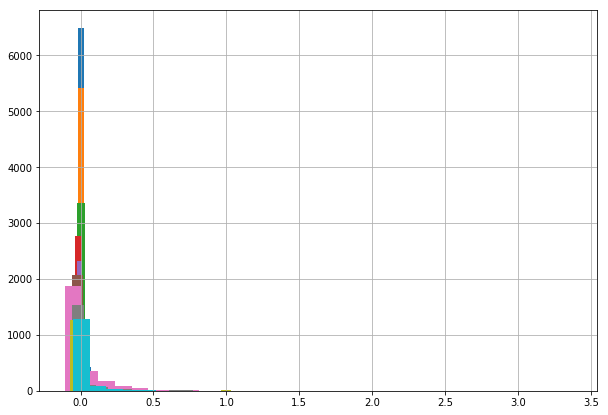

In [646]:
for x in (data['city'].value_counts())[0:10].index:
    data['num_of_revs_per_city_revs'][data['city'] == x].hist(bins=30)
plt.show()

### Посмотрим распределение целевой переменной

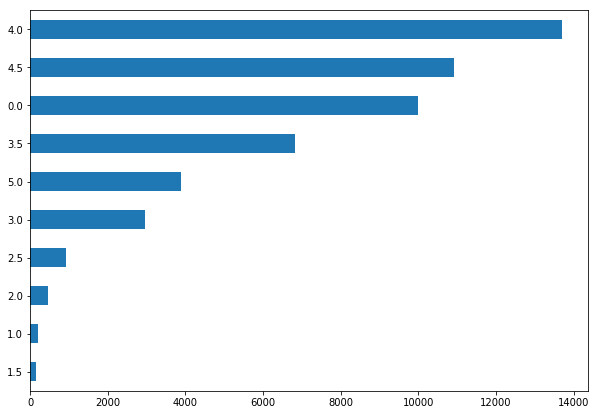

In [647]:
data['rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

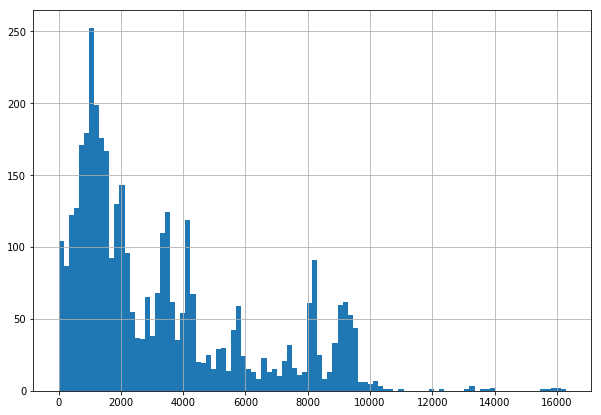

In [648]:
data['ranking'][data['rating'] == 5].hist(bins=100)

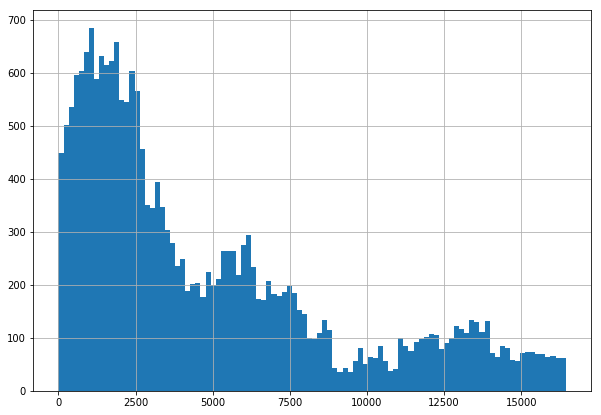

In [649]:
data['ranking'][data['rating'] < 4].hist(bins=100)

### Корреляция

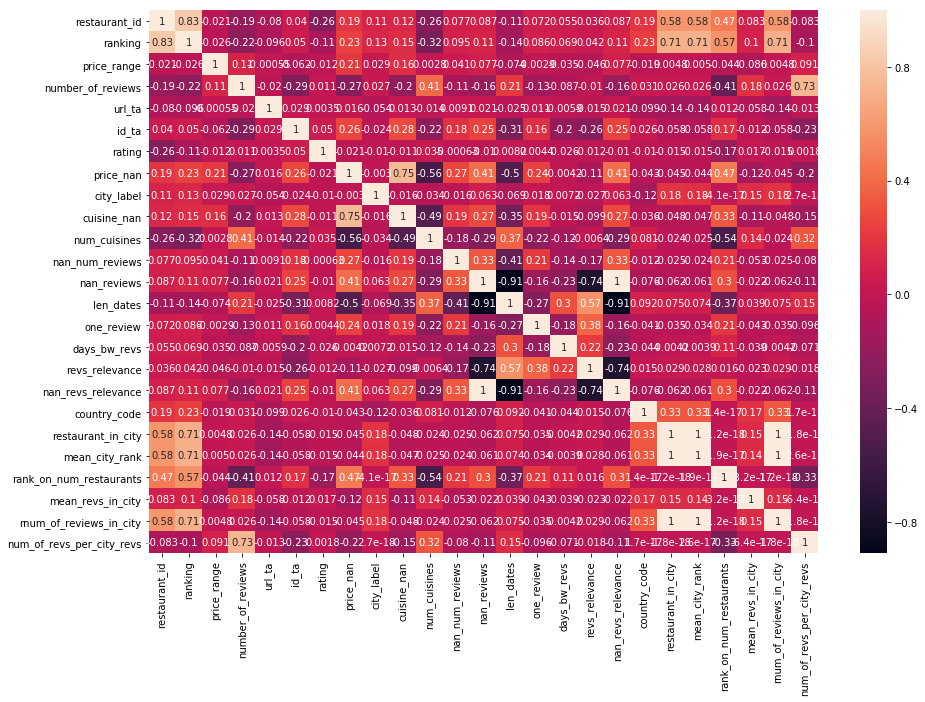

In [650]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),annot=True)

Удалим связанные между собой признаки.

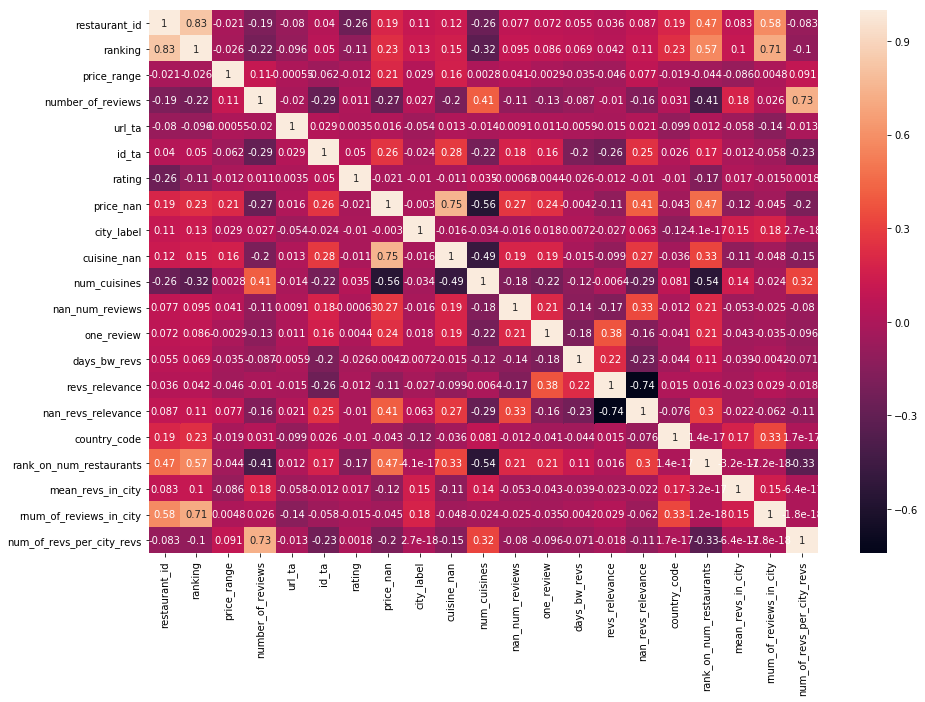

In [651]:
data.drop(['len_dates', 'mean_city_rank', 'restaurant_in_city', 'nan_reviews'], axis=1, inplace=True)
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),annot=True)

In [652]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
restaurant_id                50000 non-null int64
city                         50000 non-null object
cuisine_style                50000 non-null object
ranking                      50000 non-null float64
price_range                  50000 non-null int64
number_of_reviews            50000 non-null float64
reviews                      50000 non-null object
url_ta                       50000 non-null int64
id_ta                        50000 non-null int64
sample                       50000 non-null int64
rating                       50000 non-null float64
price_nan                    50000 non-null bool
city_label                   50000 non-null int64
cuisine_nan                  50000 non-null bool
num_cuisines                 50000 non-null int64
nan_num_reviews              50000 non-null bool
rev_dates                    50000 non-null object
one_review                   50000

# ML

Удалим не числовые сталбцы.

In [653]:
data.drop(['city', 'cuisine_style', 'reviews', 'rev_dates', 'country'], axis = 1, inplace = True)

Разбиваем датасет на тренировочный и тестовый


In [654]:
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

In [655]:
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [656]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 21), (40000, 21), (40000, 20), (32000, 20), (8000, 20))

Обучаем модель, генерируем результат и сравниваем с тестом


In [657]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [658]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)
#округлим полученные предсказания до 0.5
y_pred = np.round(y_pred*2)/2

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [659]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика Mean Absolute Error (MAE) показывает среднее отклонение предсказанных значений от фактических.
MAE = metrics.mean_absolute_error(y_test, y_pred)
print('MAE:', MAE)

MAE: 0.166875


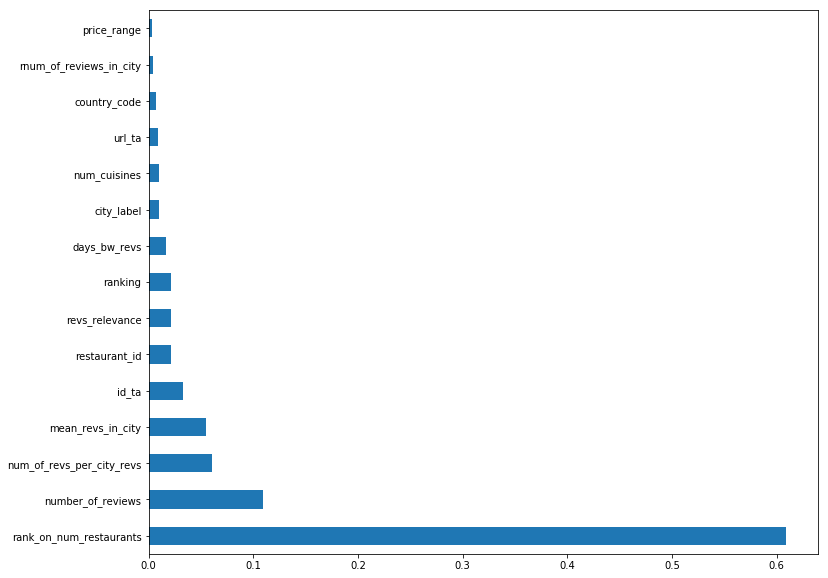

In [660]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (12,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission

In [661]:
test_data.sample(10)

,restaurant_id,ranking,price_range,number_of_reviews,url_ta,id_ta,rating,price_nan,city_label,cuisine_nan,...,nan_num_reviews,one_review,days_bw_revs,revs_relevance,nan_revs_relevance,country_code,rank_on_num_restaurants,mean_revs_in_city,rnum_of_reviews_in_city,num_of_revs_per_city_revs
158,158,4566.0,2,14.0,187323,7364422,0.0,False,3,False,...,False,False,2.0,1593.0,False,6,0.484504,57.642514,2705,-0.016134
623,623,2423.0,2,63.0,187849,2320334,0.0,True,20,False,...,False,False,0.0,0.0,True,10,-0.253537,160.115071,2694,-0.036049
6068,6068,1103.0,2,10.0,188113,6400551,0.0,False,30,False,...,False,False,249.0,1187.0,False,20,0.450686,68.275912,685,-0.085074
7357,7357,1435.0,2,23.0,188590,11768463,0.0,False,0,False,...,False,False,28.0,810.0,False,12,-0.114132,141.263848,1372,-0.086198
927,927,1071.0,2,204.0,187147,942681,0.0,False,24,False,...,False,False,43.0,972.0,False,5,-0.960635,111.464800,6108,0.015150
5191,5191,455.0,2,75.0,187331,1038828,0.0,False,11,False,...,False,False,53.0,805.0,False,6,-0.776062,41.191400,1186,0.028506
12,12,1987.0,1,10.0,187309,958943,0.0,False,21,False,...,False,True,0.0,3611.0,False,6,0.538605,71.952838,1145,-0.054107
1083,1083,960.0,2,11.0,187331,6863209,0.0,False,11,False,...,False,False,819.0,827.0,False,6,-0.350261,41.191400,1186,-0.025456
7019,7019,8043.0,2,76.0,186338,11912469,0.0,False,16,False,...,False,False,35.0,760.0,False,21,-0.017615,129.816488,7193,-0.007482
8033,8033,9746.0,2,200.0,187147,1815498,0.0,False,24,False,...,False,False,41.0,975.0,False,5,0.459634,111.464800,6108,0.014495


In [662]:
test_data = test_data.drop(['rating'], axis=1)

In [663]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [664]:
predict_submission = model.predict(test_data)
predict_submission = (predict_submission * 2).round() / 2

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [665]:
predict_submission

array([3. , 4.5, 4.5, ..., 3. , 4.5, 4.5])

In [666]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.5
7,id_7,2.5
8,id_8,4.0
9,id_9,4.5
